=== DATA SHAPE ===
Rows: 95662, Columns: 16

=== DATA TYPES ===
object     11
int64       4
float64     1
Name: count, dtype: int64

=== SAMPLE TRANSACTIONS (Full Columns) ===


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
27130,TransactionId_54158,BatchId_65764,AccountId_4425,SubscriptionId_197,CustomerId_4882,UGX,256,ProviderId_5,ProductId_14,financial_services,ChannelId_3,2090.0,2090,2018-12-14T16:33:09Z,2,0
15866,TransactionId_35272,BatchId_110469,AccountId_4249,SubscriptionId_4429,CustomerId_7343,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-40000.0,40000,2018-12-04T16:20:44Z,4,0
33666,TransactionId_102674,BatchId_104119,AccountId_3696,SubscriptionId_3099,CustomerId_4138,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-12-20T11:00:03Z,4,0
40811,TransactionId_120823,BatchId_48392,AccountId_3441,SubscriptionId_3150,CustomerId_3876,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-12-26T09:55:00Z,2,0
93673,TransactionId_35501,BatchId_115151,AccountId_4098,SubscriptionId_3901,CustomerId_4548,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,600.0,600,2019-02-11T14:32:35Z,2,0



=== NUMERICAL FEATURES SUMMARY ===
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

=== CATEGORICAL FEATURES SUMMARY ===

TransactionId:
TransactionId
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
TransactionId_28195    1
Name: count, dtype: int64

BatchId:
BatchId
BatchId_67019     28
Batc

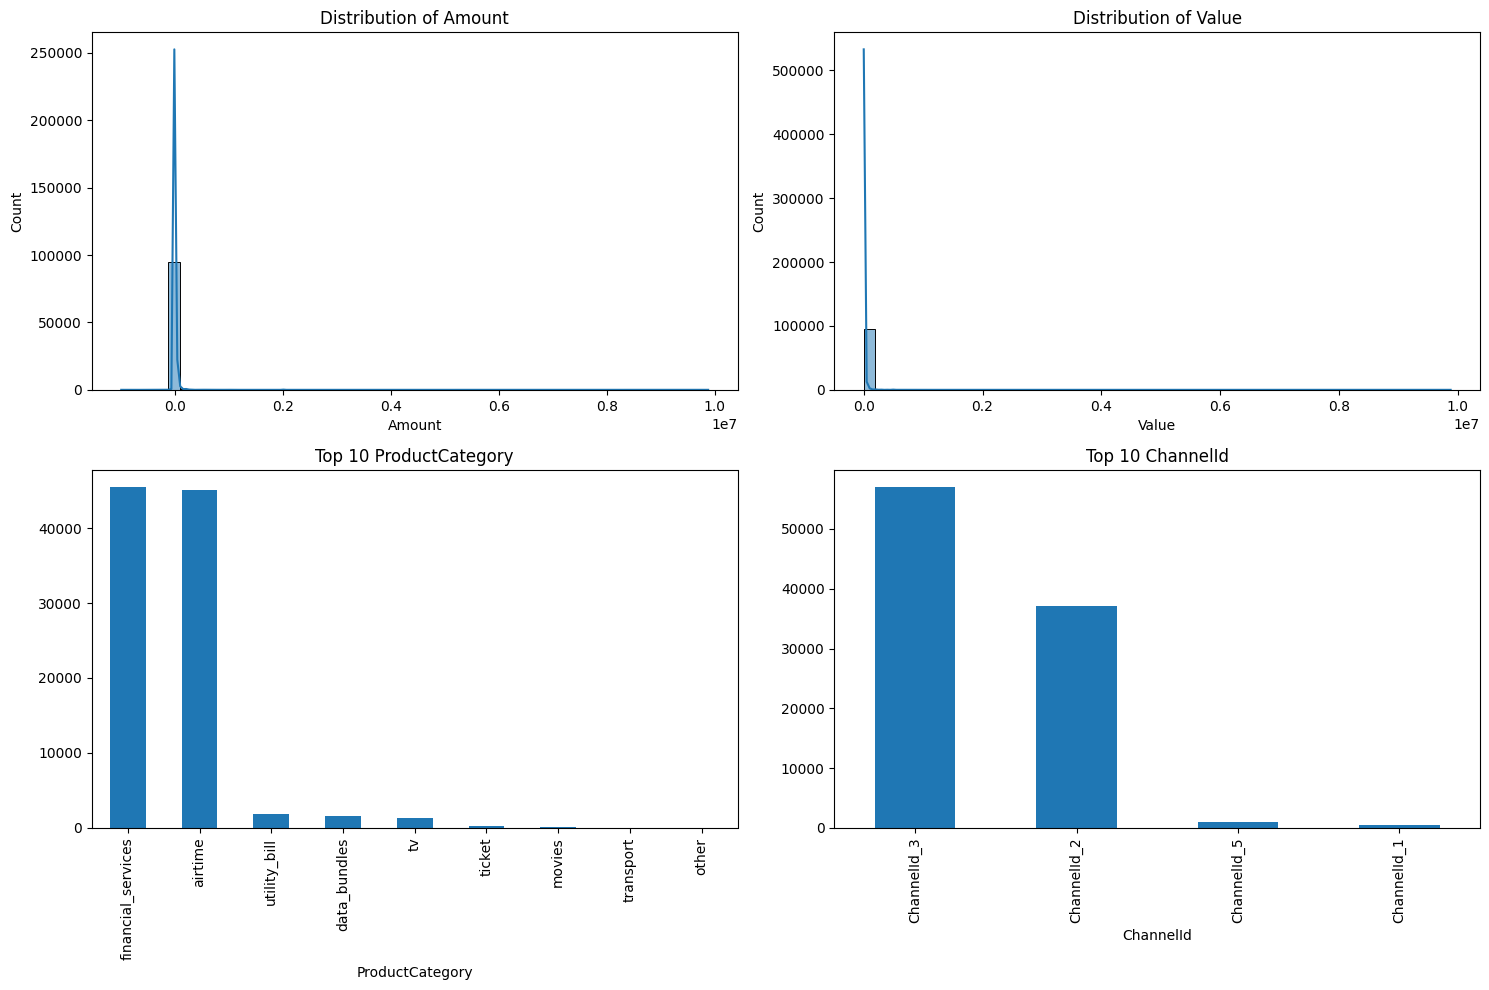


=== TRANSACTION TYPES ===
TransactionType
Debit     57473
Credit    38189
Name: count, dtype: int64

=== NUMERICAL FEATURE CORRELATIONS ===


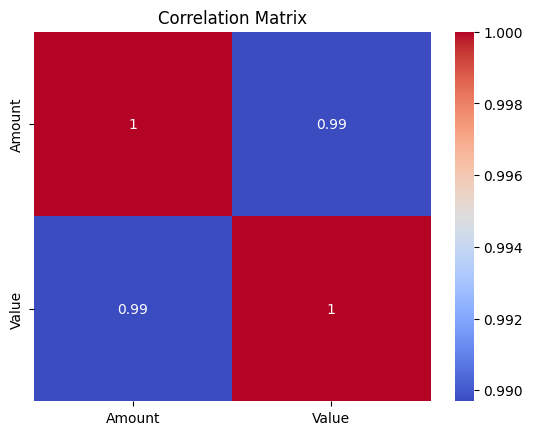

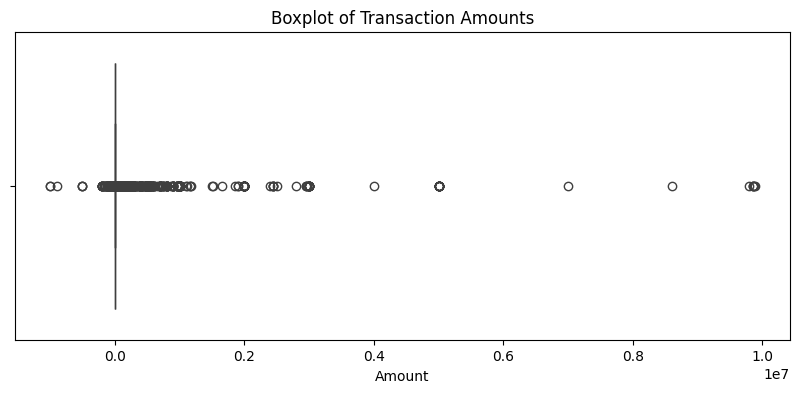

In [ ]:
# notebooks/1.0-eda.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Load Data ==========
data = pd.read_csv("../data/raw/data.csv")
variable_defs = pd.read_excel("../data/raw/Xente_Variable_Definitions.xlsx") 

# ========== 2. Data Overview ==========
print("=== DATA SHAPE ===")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

print("\n=== DATA TYPES ===")
print(data.dtypes.value_counts())

print("\n=== SAMPLE TRANSACTIONS (Full Columns) ===")
pd.set_option('display.max_columns', None)
display(data.sample(5))

# ========== 3. Summary Statistics ==========
print("\n=== NUMERICAL FEATURES SUMMARY ===")
print(data.describe())

print("\n=== CATEGORICAL FEATURES SUMMARY ===")
cat_cols = data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\n{col}:")
    print(data[col].value_counts().head())

# ========== 4. Missing Values ==========
print("\n=== MISSING VALUES ===")
missing = data.isnull().sum()
print(missing[missing > 0])

# ========== 5. Distribution Plots ==========
plt.figure(figsize=(15, 10))

# Numerical Features
num_cols = ['Amount', 'Value']
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")

# ========== 6. Transaction Analysis ==========
print("\n=== TRANSACTION TYPES ===")
data['TransactionType'] = data['Amount'].apply(lambda x: 'Debit' if x > 0 else 'Credit')
print(data['TransactionType'].value_counts())

# ========== 7. Correlation Analysis ==========
print("\n=== NUMERICAL FEATURE CORRELATIONS ===")
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# ========== 8. Outlier Detection ==========
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['Amount'])
plt.title("Boxplot of Transaction Amounts")
plt.show()